In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
json_file = "final_dataset.json"
data = pd.read_json(json_file)
data.reset_index(drop = True, inplace = True)
csv_file = "final_dataset.csv"
data.to_csv(csv_file, index=False)

print("Conversion completed successfully!")

Conversion completed successfully!


In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [5]:
df = data.copy()

In [6]:
df.columns = df.columns.str.lower()


In [7]:
df.sample(3)

,url,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,gardenarea,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
44340,https://www.immoweb.be/en/classified/apartment...,0.00,3,NaN,Belgium,Soignies,NaN,None,NaN,NaN,NaN,INSTALLED,121.00,BRAINE-LE-COMTE,NaN,2.00,None,7090,334900,11456115,Hainaut,Wallonie,NaN,0.00,None,apartment,NaN,NaN,1.00,0.00,2,residential_sale
91192,https://www.immoweb.be/en/classified/apartment...,NaN,3,NaN,Belgium,Namur,NaN,None,NaN,NaN,NaN,None,117.00,Éghezée,21.00,NaN,F,5310,1150,11362852,Namur,Wallonie,4.00,1.00,GOOD,ground_floor,NaN,NaN,1.00,1.00,2,residential_monthly_rent
110860,https://www.immoweb.be/en/classified/apartment...,NaN,2,NaN,Belgium,Dinant,NaN,None,NaN,NaN,NaN,INSTALLED,88.00,Marchienne-au-Pont,NaN,NaN,A,5590,300000,11150397,Namur,Wallonie,NaN,1.00,None,apartment,NaN,NaN,NaN,1.00,2,residential_sale


In [8]:
df.shape

(118714, 32)

# Duplicated Rows Check

In [9]:
df.duplicated().sum()

0

# NULL VALUES

In [10]:
df.isnull().sum()

url                       0
bathroomcount          9602
bedroomcount              0
constructionyear      49816
country                   0
district                  7
fireplace            114591
floodingzone          60372
furnished             88389
garden                96211
gardenarea            96211
kitchen               51580
livingarea            14175
locality                  2
monthlycharges       105064
numberoffacades       41772
peb                   33640
postalcode                0
price                     0
propertyid                0
province                  7
region                    7
roomcount             85798
showercount           61587
stateofbuilding       37092
subtypeofproperty         0
surfaceofplot         60477
swimmingpool          78356
terrace               50370
toiletcount           22273
typeofproperty            0
typeofsale                0
dtype: int64

In [11]:
df.isnull().mean() * 100

url                  0.00
bathroomcount        8.09
bedroomcount         0.00
constructionyear    41.96
country              0.00
district             0.01
fireplace           96.53
floodingzone        50.85
furnished           74.46
garden              81.04
gardenarea          81.04
kitchen             43.45
livingarea          11.94
locality             0.00
monthlycharges      88.50
numberoffacades     35.19
peb                 28.34
postalcode           0.00
price                0.00
propertyid           0.00
province             0.01
region               0.01
roomcount           72.27
showercount         51.88
stateofbuilding     31.24
subtypeofproperty    0.00
surfaceofplot       50.94
swimmingpool        66.00
terrace             42.43
toiletcount         18.76
typeofproperty       0.00
typeofsale           0.00
dtype: float64

In [12]:
df.isnull().sum() * 100 / df.shape[0] 

url                  0.00
bathroomcount        8.09
bedroomcount         0.00
constructionyear    41.96
country              0.00
district             0.01
fireplace           96.53
floodingzone        50.85
furnished           74.46
garden              81.04
gardenarea          81.04
kitchen             43.45
livingarea          11.94
locality             0.00
monthlycharges      88.50
numberoffacades     35.19
peb                 28.34
postalcode           0.00
price                0.00
propertyid           0.00
province             0.01
region               0.01
roomcount           72.27
showercount         51.88
stateofbuilding     31.24
subtypeofproperty    0.00
surfaceofplot       50.94
swimmingpool        66.00
terrace             42.43
toiletcount         18.76
typeofproperty       0.00
typeofsale           0.00
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118714 entries, 0 to 118713
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   url                118714 non-null  object 
 1   bathroomcount      109112 non-null  float64
 2   bedroomcount       118714 non-null  int64  
 3   constructionyear   68898 non-null   float64
 4   country            118714 non-null  object 
 5   district           118707 non-null  object 
 6   fireplace          4123 non-null    float64
 7   floodingzone       58342 non-null   object 
 8   furnished          30325 non-null   float64
 9   garden             22503 non-null   float64
 10  gardenarea         22503 non-null   float64
 11  kitchen            67134 non-null   object 
 12  livingarea         104539 non-null  float64
 13  locality           118712 non-null  object 
 14  monthlycharges     13650 non-null   float64
 15  numberoffacades    76942 non-null   float64
 16  pe

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcount,109112.00,1.23,1.09,0.00,1.00,1.00,1.00,145.00
bedroomcount,118714.00,2.71,1.86,0.00,2.00,3.00,3.00,200.00
constructionyear,68898.00,1987.35,47.31,1753.00,1964.00,2000.00,2023.00,8071.00
fireplace,4123.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
furnished,30325.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
garden,22503.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
gardenarea,22503.00,45099.60,6666220.45,1.00,48.00,140.00,450.00,999999999.00
livingarea,104539.00,167.40,1814.59,9.00,90.00,124.00,182.00,452230.00
monthlycharges,13650.00,84.24,179.61,0.00,0.00,30.00,120.00,5250.00
numberoffacades,76942.00,2.79,0.87,1.00,2.00,3.00,4.00,24.00


In [15]:
df.describe(include = 'O').T

,count,unique,top,freq
url,118714,118714,https://www.immoweb.be/en/classified/apartment...,1
country,118714,1,Belgium,118714
district,118707,43,Brussels,14098
floodingzone,58342,9,NON_FLOOD_ZONE,55998
kitchen,67134,8,INSTALLED,32623
locality,118712,5738,Antwerpen,2396
peb,85074,18,B,18134
province,118707,11,West Flanders,20904
region,118707,3,Flanders,69669
stateofbuilding,81622,6,GOOD,43442


## Numerical and Categorical Variables

In [16]:
category_var = df.select_dtypes(include = 'object')
num_var = df.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  12
Number of numerical features are:  20


# Url

In [17]:
df.url.isna().sum()

0

In [18]:
df.drop('url', axis = 1, inplace = True)

# BathroomCount         

In [19]:
df.bathroomcount.isna().sum()

9602

In [20]:
mean_value = round(df.bathroomcount.mean())

mean_value

1

In [21]:
df['bathroomcount'].fillna(mean_value, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\800088645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bathroomcount'].fillna(mean_value, inplace = True)


In [22]:
df['bathroomcount']= df['bathroomcount'].astype(int)

In [23]:
df.bathroomcount.isna().sum()

0

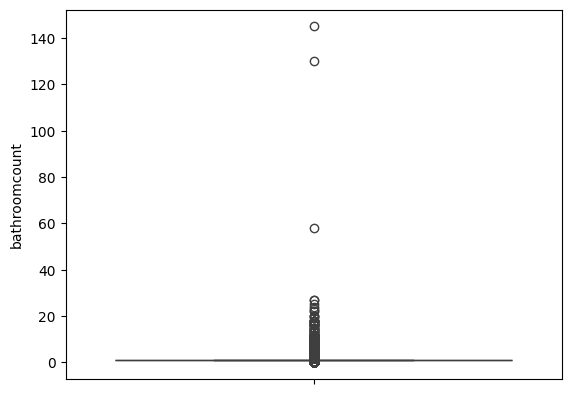

In [24]:

sns.boxplot(df.bathroomcount)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

# BedroomCount

In [25]:
df.bedroomcount.isna().sum()

0

In [26]:
df.bedroomcount.value_counts(normalize=True, dropna=False)

bedroomcount
2     0.32
3     0.32
1     0.12
4     0.12
5     0.04
0     0.03
6     0.02
7     0.01
8     0.00
9     0.00
10    0.00
12    0.00
11    0.00
14    0.00
13    0.00
15    0.00
16    0.00
20    0.00
18    0.00
17    0.00
30    0.00
25    0.00
24    0.00
22    0.00
26    0.00
19    0.00
35    0.00
27    0.00
39    0.00
34    0.00
21    0.00
200   0.00
29    0.00
48    0.00
23    0.00
33    0.00
88    0.00
37    0.00
60    0.00
31    0.00
28    0.00
63    0.00
100   0.00
47    0.00
36    0.00
70    0.00
45    0.00
44    0.00
32    0.00
41    0.00
Name: proportion, dtype: float64

(118714, 31)

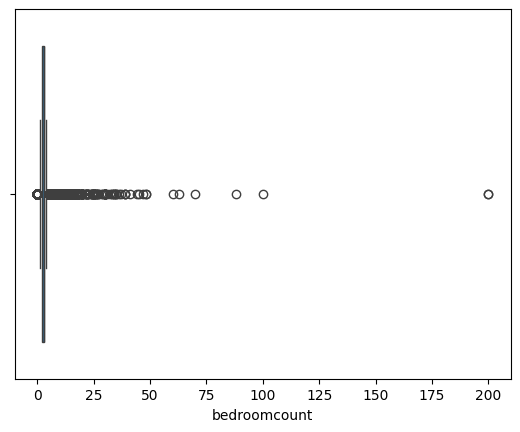

In [27]:
display(df.shape)
sns.boxplot(x=df['bedroomcount']);

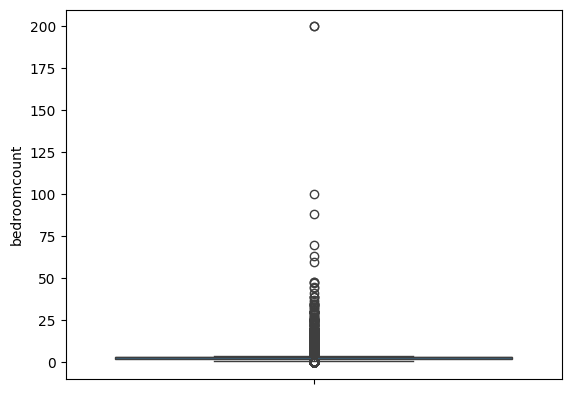

In [28]:

sns.boxplot(df.bedroomcount)

plt.ticklabel_format(style='plain', axis='y')  

plt.show()

# **KNN Imputation**

### *StateOfBuilding, constructionyear, roomcount, surfaceofplot, numberoffacades, livingarea, Kitchen*



In [29]:
df.stateofbuilding.isna().sum() / df.shape[0]

0.3124484054113247

In [30]:
df.stateofbuilding.value_counts(normalize= True, dropna= False)

stateofbuilding
GOOD             0.37
None             0.31
AS_NEW           0.16
TO_RENOVATE      0.06
TO_BE_DONE_UP    0.05
JUST_RENOVATED   0.05
TO_RESTORE       0.00
Name: proportion, dtype: float64

In [31]:
state_mapping = {
    'TO_RESTORE': 0,
    'TO_RENOVATE': 1,
    'TO_BE_DONE_UP': 2,
    'JUST_RENOVATED': 3,
    'GOOD': 4,
    'AS_NEW': 5
}

In [32]:
df['stateofbuilding'] = df['stateofbuilding'].map(state_mapping)
df.stateofbuilding.value_counts(dropna= False)

stateofbuilding
4.00    43442
NaN     37092
5.00    18969
1.00     7544
2.00     5721
3.00     5484
0.00      462
Name: count, dtype: int64

In [34]:
df.kitchen.value_counts( dropna = False)

kitchen
None                  51580
INSTALLED             32623
HYPER_EQUIPPED        19773
SEMI_EQUIPPED          7810
NOT_INSTALLED          3897
USA_HYPER_EQUIPPED     1438
USA_INSTALLED          1288
USA_SEMI_EQUIPPED       201
USA_UNINSTALLED         104
Name: count, dtype: int64

In [35]:
kitchen_mapping = {
    'USA_HYPER_EQUIPPED': 'HYPER_EQUIPPED',
    'USA_INSTALLED': 'INSTALLED',
    'USA_UNINSTALLED': 'NOT_INSTALLED',
    'USA_SEMI_EQUIPPED': 'SEMI_EQUIPPED',
}

df['kitchen'] =df.kitchen.replace(kitchen_mapping)
display(df.kitchen.value_counts(dropna = False))

kitchen_new_mapping = {
    'NOT_INSTALLED': 0,
    'INSTALLED': 1,
    'SEMI_EQUIPPED': 2,
    'HYPER_EQUIPPED': 3
}
df['kitchen'] = df['kitchen'].map(kitchen_new_mapping)

display(df.kitchen.value_counts( dropna = False))

kitchen
None              51580
INSTALLED         33911
HYPER_EQUIPPED    21211
SEMI_EQUIPPED      8011
NOT_INSTALLED      4001
Name: count, dtype: int64

kitchen
NaN     51580
1.00    33911
3.00    21211
2.00     8011
0.00     4001
Name: count, dtype: int64

In [36]:
columns_for_imputation = ['roomcount','surfaceofplot', 'stateofbuilding', 'numberoffacades', 'livingarea', 'bedroomcount', 'bathroomcount', 'constructionyear', 'price', 'kitchen']
knn_imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[columns_for_imputation]), columns = columns_for_imputation)

df_imputed['stateofbuilding'] = np.round(df_imputed['stateofbuilding']).astype(int)
df_imputed['stateofbuilding'] = df_imputed['stateofbuilding'].apply(lambda x: x if x in state_mapping.values() else np.nan)
df['stateofbuilding'] = df_imputed['stateofbuilding'].values

df_imputed['kitchen'] = np.round(df_imputed['kitchen']).astype(int)
df_imputed['kitchen'] = df_imputed['kitchen'].apply(lambda x: x if x in kitchen_new_mapping.values() else np.nan)
df['kitchen'] = df_imputed['kitchen'].values                                            

df['constructionyear'] = df_imputed['constructionyear'].values

df['roomcount'] = df_imputed['roomcount'].values

df['surfaceofplot'] = df_imputed['surfaceofplot'].values

df['numberoffacades'] = df_imputed['numberoffacades'].values

df['livingarea'] = df_imputed['livingarea'].values


In [37]:
print("Number of missing values in ",
      "\n constructionyear:", df['constructionyear'].isna().sum(),
      "\n roomcount: ", df['roomcount'].isna().sum(),
      "\n surfaceofplot: ", df['surfaceofplot'].isna().sum(),
      "\n numberoffacades: ", df['numberoffacades'].isna().sum(),
      "\n livingarea : ", df['livingarea'].isna().sum(),
      "\n kitchen", df['kitchen'].isna().sum())

Number of missing values in  
 constructionyear: 0 
 roomcount:  0 
 surfaceofplot:  0 
 numberoffacades:  0 
 livingarea :  0 
 kitchen 0


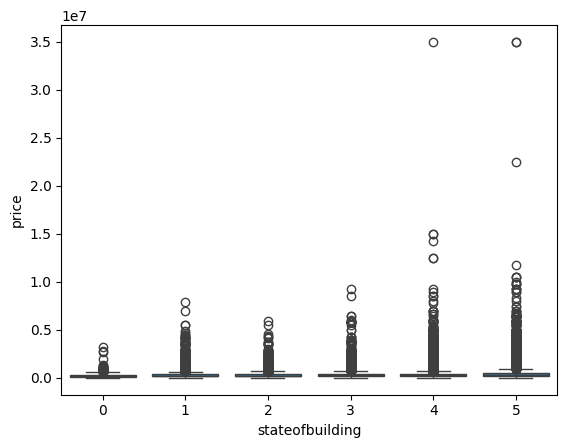

In [38]:
sns.boxplot(data = df, x = 'stateofbuilding', y = 'price');


# ConstructionYear

In [40]:
display(df.constructionyear.isnull().sum())

0

In [41]:
df.constructionyear.value_counts(dropna = False)

constructionyear
2024.00    10868
2023.00     8336
2022.00     2850
2025.00     1695
1930.00     1599
2021.00     1542
1970.00     1189
1960.00      982
2020.00      959
2023.60      888
1965.00      856
2023.40      832
1950.00      829
2019.00      827
1968.00      811
1975.00      782
1976.00      780
2023.20      770
1900.00      762
2017.00      761
2018.00      758
1918.00      736
1977.00      713
1974.00      706
1990.00      706
1980.00      704
1978.00      701
2015.00      700
2010.00      690
1966.00      688
1967.00      678
2023.80      668
1850.00      657
2016.00      655
1969.00      653
2005.00      650
2009.00      647
2008.00      641
2007.00      634
2006.00      629
2012.00      624
1971.00      619
2004.00      611
2014.00      610
1964.00      606
1995.00      605
1972.00      603
1993.00      598
1973.00      596
1979.00      583
1963.00      579
2011.00      573
1992.00      568
2001.00      567
1958.00      554
1994.00      553
1962.00      550
1991.00      5

In [42]:
df.constructionyear.describe()

count   118714.00
mean      1990.57
std         40.30
min       1753.00
25%       1971.00
50%       1998.60
75%       2021.80
max       8071.00
Name: constructionyear, dtype: float64

(118714, 31)

(116748, 31)

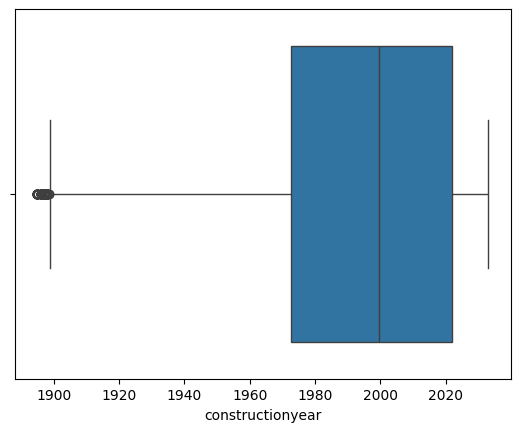

In [43]:
display(df.shape)
q1 = df.constructionyear.quantile(0.25)
q3 = df.constructionyear.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df.constructionyear > lower_bound) & (df.constructionyear < upper_bound)]
display(df.shape)
sns.boxplot(x=df['constructionyear']);
# print(lower_bound, upper_bound)

In [44]:
df.constructionyear = df.constructionyear.astype(int)
df.constructionyear.value_counts(dropna = False)


constructionyear
2023    11494
2024    11439
2022     4364
2021     2230
2025     1720
1930     1618
1970     1523
2020     1438
2010     1401
1990     1350
2008     1317
2012     1317
2019     1302
2005     1298
2017     1297
2009     1294
2018     1291
2007     1283
2006     1257
1997     1254
1995     1253
1976     1243
1978     1242
2011     1242
1975     1221
2014     1218
2015     1203
1996     1197
1960     1197
1999     1195
1980     1184
1993     1174
2000     1171
2004     1169
2003     1163
1998     1160
2001     1157
1965     1137
1977     1132
1968     1117
2013     1117
1994     1113
1991     1089
1989     1084
2016     1082
1974     1079
1979     1073
2002     1072
1992     1055
1988     1040
1986     1033
1972     1025
1971     1022
1973     1008
1966      976
1967      972
1985      966
1969      941
1981      934
1950      932
1987      931
1964      881
1983      838
1984      824
1982      820
1963      813
1958      766
1900      763
1962      757
1918      751
196

# Country               

In [45]:
df.country.isnull().sum()

0

In [46]:
df.country.value_counts(normalize=True, dropna=False)   

country
Belgium   1.00
Name: proportion, dtype: float64

# District              

In [47]:
df.district.isnull().sum()

7

In [48]:
df[df.district.isnull()]

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,gardenarea,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
59588,1,3,1965,Belgium,None,NaN,NON_FLOOD_ZONE,0.00,NaN,NaN,1,250.00,Rombach,NaN,4.00,None,8814,695000,11426204,None,None,4.60,NaN,3,apartment,11440.80,0.00,NaN,NaN,2,residential_sale
61035,1,1,1960,Belgium,None,NaN,None,NaN,NaN,NaN,2,49.00,None,NaN,2.20,None,8548,219000,11368112,None,None,7.00,NaN,3,flat_studio,84.00,NaN,1.00,NaN,2,residential_sale
61042,1,1,2023,Belgium,None,NaN,None,NaN,NaN,NaN,1,49.00,None,NaN,2.00,None,8545,216500,11368105,None,None,5.20,NaN,4,flat_studio,201.20,NaN,1.00,NaN,2,residential_sale
81496,1,1,2006,Belgium,None,NaN,None,NaN,NaN,NaN,1,52.00,Gent,25.00,2.40,B,0,750,11297796,None,None,4.00,0.00,4,apartment,0.00,NaN,NaN,1.00,2,residential_monthly_rent
84229,2,3,2020,Belgium,None,1.00,NON_FLOOD_ZONE,NaN,NaN,NaN,2,214.00,Cadzand,NaN,3.00,A++,4506,4950000,11204872,None,None,1.00,0.00,5,apartment,10203.20,1.00,1.00,0.00,2,residential_sale
89496,2,2,2020,Belgium,None,1.00,NON_FLOOD_ZONE,NaN,NaN,NaN,3,204.00,Cadzand,NaN,2.00,A++,4506,3950000,11182982,None,None,3.00,1.00,5,apartment,20645.00,1.00,1.00,3.00,2,residential_sale
89783,2,3,2020,Belgium,None,1.00,NON_FLOOD_ZONE,NaN,NaN,NaN,2,214.00,Cadzand,NaN,3.00,A++,4506,4950000,11180310,None,None,4.00,0.00,4,apartment,10203.20,1.00,1.00,0.00,2,residential_sale


In [49]:
df['district'] = df.apply(lambda x: "Knokke-Heist" if x.locality == 'Cadzand' else x['district'], axis = 1)

df['district'] = df.apply(lambda x: "Gent" if x.locality == 'Gent' else x['district'], axis = 1)

df['district'] = df.apply(lambda x: "Marche-en-Famenne" if x.locality == 'Rombach' else x['district'], axis = 1)

df['district'] = df.apply(lambda x: "Gent" if x.district == None else x['district'], axis = 1)


In [50]:
df.district.isnull().sum()

0

# Fireplace            

In [51]:
df.fireplace.isnull().sum()

112804

In [52]:
df.fireplace.value_counts(dropna=False)

fireplace
NaN     112804
1.00      3944
Name: count, dtype: int64

In [53]:
df.fireplace.fillna(0 , inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\1486195836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.fireplace.fillna(0 , inplace = True)


In [54]:
df.fireplace = df.fireplace.astype(int)
display(df.fireplace.value_counts( dropna=False))


fireplace
0    112804
1      3944
Name: count, dtype: int64

# FloodingZone         

In [55]:
df.floodingzone.isnull().sum() / df.shape[0]

0.5103213759550485

In [56]:
df.groupby('district')['floodingzone'].value_counts(ascending = False, dropna=False)

district           floodingzone                                   
Aalst              NON_FLOOD_ZONE                                     1725
                   NaN                                                1666
                   POSSIBLE_FLOOD_ZONE                                  68
                   RECOGNIZED_FLOOD_ZONE                                17
Antwerp            NON_FLOOD_ZONE                                     6185
                   NaN                                                3678
                   POSSIBLE_FLOOD_ZONE                                 168
                   RECOGNIZED_FLOOD_ZONE                                88
                   POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE                  11
                   RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE                 9
                   CIRCUMSCRIBED_WATERSIDE_ZONE                          4
                   CIRCUMSCRIBED_FLOOD_ZONE                              3
                   POSSIBLE_N_CIR

In [57]:
df.floodingzone.fillna('NON_FLOOD_ZONE', inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\935411990.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.floodingzone.fillna('NON_FLOOD_ZONE', inplace = True)


In [58]:
df.floodingzone.value_counts(dropna=False)

floodingzone
NON_FLOOD_ZONE                                     114472
POSSIBLE_FLOOD_ZONE                                  1479
RECOGNIZED_FLOOD_ZONE                                 625
CIRCUMSCRIBED_WATERSIDE_ZONE                           57
POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE                    47
CIRCUMSCRIBED_FLOOD_ZONE                               34
RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE                  20
POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE                 9
RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE         5
Name: count, dtype: int64

# Furnished

In [59]:
df.furnished.isnull().sum()

87188

In [60]:
df.furnished.fillna(0, inplace = True)


C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\727708344.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.furnished.fillna(0, inplace = True)


In [61]:
df.furnished = df.furnished.astype(int)

In [62]:
display(df.furnished.value_counts(dropna=False))


furnished
0    114681
1      2067
Name: count, dtype: int64

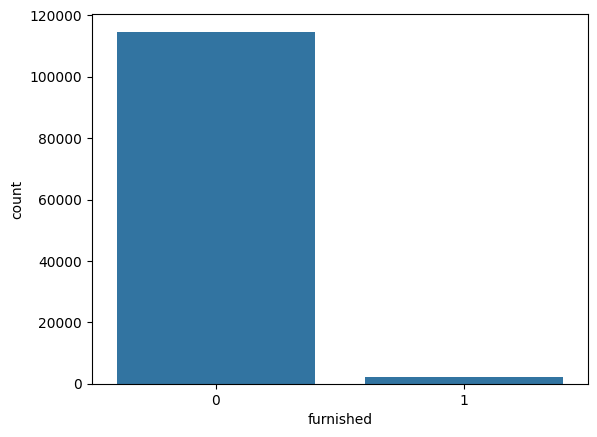

In [63]:
sns.countplot(data = df, x = 'furnished');

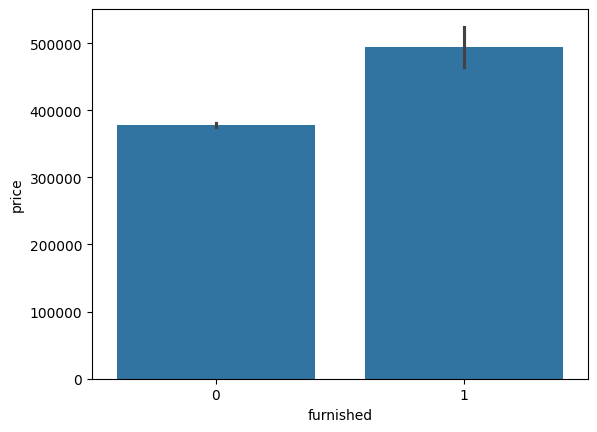

In [64]:
sns.barplot(data = df, x = 'furnished', y = 'price');

#  Garden

In [65]:
df.garden.value_counts(normalize= True, dropna = False)

garden
NaN    0.81
1.00   0.19
Name: proportion, dtype: float64

In [66]:
df['garden'].fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\3323151509.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['garden'].fillna(0, inplace = True)


In [67]:
df.garden = df.garden.astype(int)

In [68]:
df.garden.dtype

dtype('int32')

In [69]:
df.garden.value_counts(normalize= True, dropna = False)

garden
0   0.81
1   0.19
Name: proportion, dtype: float64

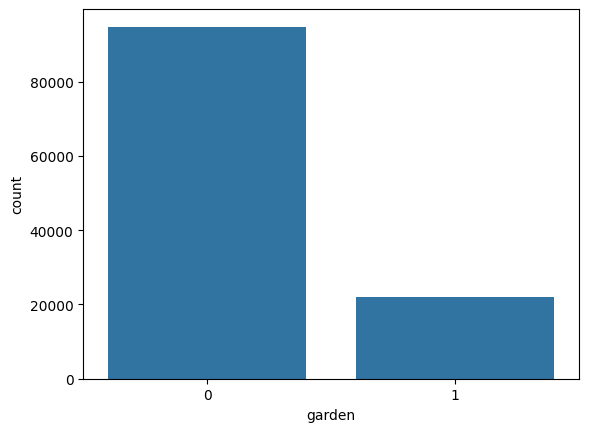

In [70]:
sns.countplot(data = df, x = 'garden');

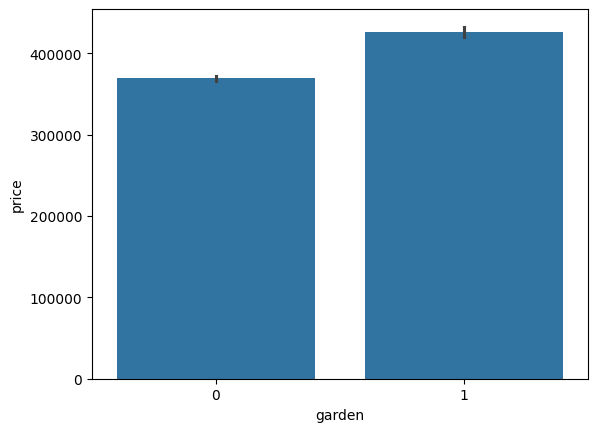

In [71]:
sns.barplot(data = df, x = 'garden', y = 'price');

# GardenArea

In [72]:
df.gardenarea.isna().sum() / df.shape[0]

0.8122451776475829

### *There is more than 80% missing values in the GardenArea column. So, it is better to drop this column.*

In [73]:
df.drop('gardenarea', axis = 1, inplace = True)

# LivingArea

In [76]:
df.livingarea.isna().sum()

0

In [74]:
df.livingarea.value_counts( dropna = False)

livingarea
90.00        1872
100.00       1836
85.00        1508
110.00       1446
120.00       1381
80.00        1377
150.00       1361
95.00        1322
140.00       1257
130.00       1126
75.00        1081
70.00        1063
160.00       1038
105.00       1017
200.00       1012
180.00        966
92.00         959
91.00         909
96.00         879
89.00         866
125.00        849
97.00         845
93.00         842
88.00         834
65.00         834
60.00         801
115.00        798
94.00         797
170.00        792
86.00         788
87.00         785
98.00         776
82.00         763
83.00         750
99.00         748
102.00        734
84.00         732
104.00        707
106.00        705
103.00        686
135.00        665
145.00        653
112.00        641
101.00        628
76.00         626
165.00        624
108.00        608
190.00        606
107.00        594
78.00         590
175.00        583
72.00         539
81.00         539
109.00        536
55.00         533

# Locality

In [77]:
df.locality.isna().sum()

2

In [78]:
df[df.locality.isna()]

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
61035,1,1,1960,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,2,49.00,None,NaN,2.20,None,8548,219000,11368112,None,None,7.00,NaN,3,flat_studio,84.00,NaN,1.00,NaN,2,residential_sale
61042,1,1,2023,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,1,49.00,None,NaN,2.00,None,8545,216500,11368105,None,None,5.20,NaN,4,flat_studio,201.20,NaN,1.00,NaN,2,residential_sale


In [79]:
df.district.isna().sum()

0

In [80]:
df['locality'] = df.apply(lambda x: x.district if x.locality == None else x['locality'], axis = 1)

In [81]:
df.locality.isna().sum()

0

# MonthlyCharges

In [82]:
df.monthlycharges.isna().sum() / df.shape[0]

0.8843149347312159

In [83]:
df.monthlycharges.value_counts( dropna = False)

monthlycharges
NaN        103242
0.00         6094
50.00         716
100.00        613
150.00        604
200.00        391
75.00         325
250.00        274
120.00        252
60.00         250
80.00         217
30.00         184
90.00         181
25.00         165
40.00         162
300.00        156
70.00         136
125.00        134
130.00        128
20.00         119
110.00        116
85.00         115
65.00         102
180.00        100
175.00         92
35.00          90
350.00         90
140.00         79
15.00          79
45.00          76
95.00          72
160.00         72
1.00           64
220.00         57
10.00          57
400.00         52
55.00          51
190.00         49
500.00         48
115.00         41
170.00         40
135.00         38
225.00         34
165.00         31
275.00         30
450.00         26
105.00         24
145.00         21
155.00         21
230.00         19
280.00         19
210.00         18
600.00         16
195.00         15
270.00       

In [84]:
df.monthlycharges.describe()

count   13506.00
mean       83.67
std       179.09
min         0.00
25%         0.00
50%        30.00
75%       115.00
max      5250.00
Name: monthlycharges, dtype: float64

In [85]:
df.monthlycharges.fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\1059496907.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.monthlycharges.fillna(0, inplace = True)


In [86]:
df.monhtlycharges = df.monthlycharges.astype(int)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\461387135.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.monhtlycharges = df.monthlycharges.astype(int)


In [87]:
df.monhtlycharges.dtype

dtype('int32')

In [88]:
df.monthlycharges.value_counts()

monthlycharges
0.00       109336
50.00         716
100.00        613
150.00        604
200.00        391
75.00         325
250.00        274
120.00        252
60.00         250
80.00         217
30.00         184
90.00         181
25.00         165
40.00         162
300.00        156
70.00         136
125.00        134
130.00        128
20.00         119
110.00        116
85.00         115
65.00         102
180.00        100
175.00         92
35.00          90
350.00         90
140.00         79
15.00          79
45.00          76
95.00          72
160.00         72
1.00           64
220.00         57
10.00          57
400.00         52
55.00          51
190.00         49
500.00         48
115.00         41
170.00         40
135.00         38
225.00         34
165.00         31
275.00         30
450.00         26
105.00         24
145.00         21
155.00         21
230.00         19
280.00         19
210.00         18
600.00         16
195.00         15
270.00         15
240.00       

# NumberOfFacades

In [89]:
df.numberoffacades.isna().sum()


0

In [90]:
df.numberoffacades = df.numberoffacades.astype(int)
df.numberoffacades.value_counts( dropna = False)

numberoffacades
2     62077
3     32209
4     20800
1      1579
6        32
5        20
7        11
8         7
10        6
12        3
15        1
13        1
24        1
19        1
Name: count, dtype: int64

# PEB

In [91]:
df.peb.isna().sum() / df.shape[0]

0.286874293349779

In [92]:
df.peb.value_counts(normalize= True, dropna = False)

peb
None   0.29
B      0.15
A      0.13
C      0.12
D      0.10
F      0.08
E      0.06
G      0.04
A+     0.02
A++    0.01
B_A    0.00
A_A+   0.00
F_C    0.00
F_D    0.00
G_C    0.00
F_E    0.00
E_D    0.00
E_C    0.00
Name: proportion, dtype: float64

In [93]:
df.peb.fillna(df.peb.mode()[0], inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\1426290148.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.peb.fillna(df.peb.mode()[0], inplace = True)


In [94]:
df.peb.value_counts(normalize= True, dropna = False)

peb
B      0.44
A      0.13
C      0.12
D      0.10
F      0.08
E      0.06
G      0.04
A+     0.02
A++    0.01
B_A    0.00
A_A+   0.00
F_C    0.00
F_D    0.00
G_C    0.00
F_E    0.00
E_D    0.00
E_C    0.00
Name: proportion, dtype: float64

# PostalCode

In [95]:
df.postalcode.isna().sum()

0

In [96]:
df.postalcode.value_counts(normalize= True, dropna = False)

postalcode
8300   0.02
8400   0.02
4000   0.02
1000   0.02
1180   0.01
1050   0.01
9000   0.01
2000   0.01
1070   0.01
8370   0.01
8670   0.01
1030   0.01
1200   0.01
8800   0.01
5000   0.01
3000   0.01
2300   0.01
2018   0.01
9300   0.01
7500   0.01
7000   0.01
4020   0.01
2100   0.01
8000   0.01
8620   0.01
9600   0.01
8430   0.01
2800   0.01
1190   0.01
8500   0.01
3500   0.01
7700   0.01
1080   0.01
1040   0.01
1150   0.01
8660   0.00
4100   0.00
9100   0.00
9200   0.00
5100   0.00
2930   0.00
9800   0.00
2500   0.00
9120   0.00
1020   0.00
9700   0.00
1140   0.00
1420   0.00
2600   0.00
2060   0.00
1060   0.00
1160   0.00
7100   0.00
6700   0.00
2440   0.00
9500   0.00
2610   0.00
3800   0.00
8790   0.00
8301   0.00
8420   0.00
8870   0.00
1410   0.00
4800   0.00
6000   0.00
2830   0.00
1090   0.00
9940   0.00
1400   0.00
1300   0.00
2400   0.00
8530   0.00
1500   0.00
9160   0.00
1800   0.00
8200   0.00
1082   0.00
5030   0.00
9400   0.00
2640   0.00
2170   0.00
1480   0.00
7090 

# PropertyId

In [97]:
df.propertyid.isna().sum()

0

In [98]:
df.propertyid.duplicated().sum()

0

In [99]:
df[df.duplicated(subset='propertyid', keep=False)]

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale


# Province

In [100]:
df.province.isna().sum()

7

In [101]:
df.province.value_counts(normalize= True, dropna = False)

province
West Flanders     0.18
Antwerp           0.15
East Flanders     0.14
Brussels          0.12
Hainaut           0.10
Liège             0.09
Flemish Brabant   0.08
Namur             0.04
Limburg           0.04
Walloon Brabant   0.04
Luxembourg        0.03
None              0.00
Name: proportion, dtype: float64

In [152]:
df[df['province'].isnull()]

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
84229,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,2,214.00,Cadzand,0.00,3,A++,4506,4950000,11204872,None,None,1,0,5,apartment,10203,1,1,0,2,residential_sale
89496,2,2,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,3,204.00,Cadzand,0.00,2,A++,4506,3950000,11182982,None,None,3,1,5,apartment,20645,1,1,3,2,residential_sale
89783,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,2,214.00,Cadzand,0.00,3,A++,4506,4950000,11180310,None,None,4,0,4,apartment,10203,1,1,0,2,residential_sale


In [103]:
df.province = df.apply(lambda x: 'West Flanders' if x.district == 'Gent' else x['province'], axis = 1)


df.drop(df[df['locality'] == 'Rombach'].index, inplace = True)

In [104]:
df.province.isna().sum()

3

In [105]:
df.province.value_counts(normalize= True, dropna = False)

province
West Flanders     0.23
Antwerp           0.15
Brussels          0.12
Hainaut           0.10
East Flanders     0.09
Liège             0.09
Flemish Brabant   0.08
Namur             0.04
Limburg           0.04
Walloon Brabant   0.04
Luxembourg        0.03
None              0.00
Name: proportion, dtype: float64

# Region

In [106]:
df.region.isna().sum()

6

In [107]:
df.region.value_counts(normalize= True, dropna = False)

region
Flanders   0.59
Wallonie   0.29
Brussels   0.12
None       0.00
Name: proportion, dtype: float64

In [108]:
df[df['region'].isnull()]

,bathroomcount,bedroomcount,constructionyear,country,district,fireplace,floodingzone,furnished,garden,kitchen,livingarea,locality,monthlycharges,numberoffacades,peb,postalcode,price,propertyid,province,region,roomcount,showercount,stateofbuilding,subtypeofproperty,surfaceofplot,swimmingpool,terrace,toiletcount,typeofproperty,typeofsale
61035,1,1,1960,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,2,49.00,Gent,0.00,2,B,8548,219000,11368112,West Flanders,None,7.00,NaN,3,flat_studio,84.00,NaN,1.00,NaN,2,residential_sale
61042,1,1,2023,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,1,49.00,Gent,0.00,2,B,8545,216500,11368105,West Flanders,None,5.20,NaN,4,flat_studio,201.20,NaN,1.00,NaN,2,residential_sale
81496,1,1,2006,Belgium,Gent,0,NON_FLOOD_ZONE,0,0,1,52.00,Gent,25.00,2,B,0,750,11297796,West Flanders,None,4.00,0.00,4,apartment,0.00,NaN,NaN,1.00,2,residential_monthly_rent
84229,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,2,214.00,Cadzand,0.00,3,A++,4506,4950000,11204872,None,None,1.00,0.00,5,apartment,10203.20,1.00,1.00,0.00,2,residential_sale
89496,2,2,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,3,204.00,Cadzand,0.00,2,A++,4506,3950000,11182982,None,None,3.00,1.00,5,apartment,20645.00,1.00,1.00,3.00,2,residential_sale
89783,2,3,2020,Belgium,Knokke-Heist,1,NON_FLOOD_ZONE,0,0,2,214.00,Cadzand,0.00,3,A++,4506,4950000,11180310,None,None,4.00,0.00,4,apartment,10203.20,1.00,1.00,0.00,2,residential_sale


In [109]:
df.region = df.apply(lambda x: 'Flanders' if x.province == 'West Flanders' else x['region'], axis = 1)

In [110]:
df.region.value_counts(normalize= True, dropna = False)

region
Flanders   0.59
Wallonie   0.29
Brussels   0.12
None       0.00
Name: proportion, dtype: float64

# RoomCount

In [111]:
df.roomcount.isna().sum() 

0

In [112]:
df.roomcount = df.roomcount.astype(int)
df.roomcount.value_counts(dropna = False)

roomcount
5     15640
4     14890
6     14673
7     12015
3     11995
1      9667
8      8984
2      6681
9      6303
10     4490
11     2982
12     2101
13     1576
14     1572
15     1096
16      621
17      360
18      309
19      192
20      148
21       97
22       83
23       60
24       42
25       30
26       22
28       20
27       18
30       16
29       15
36        7
32        6
31        5
35        5
33        5
34        3
38        3
40        3
43        2
44        2
37        2
53        2
60        1
45        1
48        1
68        1
Name: count, dtype: int64

# ShowerCount          

In [113]:
df.showercount.isna().sum() / df.shape[0]

0.5209898327151875

In [114]:
df.showercount.value_counts(normalize= True, dropna = False)

showercount
NaN       0.52
0.00      0.27
1.00      0.16
2.00      0.03
3.00      0.01
4.00      0.00
5.00      0.00
6.00      0.00
7.00      0.00
8.00      0.00
9.00      0.00
10.00     0.00
11.00     0.00
12.00     0.00
15.00     0.00
13.00     0.00
14.00     0.00
19.00     0.00
16.00     0.00
439.00    0.00
20.00     0.00
180.00    0.00
17.00     0.00
25.00     0.00
23.00     0.00
22.00     0.00
115.00    0.00
158.00    0.00
312.00    0.00
58.00     0.00
1120.00   0.00
50.00     0.00
490.00    0.00
Name: proportion, dtype: float64

In [115]:
df.showercount.fillna(1, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\3088969583.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.showercount.fillna(1, inplace = True)


In [116]:
df.showercount = df.showercount.astype(int)
display(df.showercount.value_counts(normalize= True, dropna = False))

showercount
1      0.68
0      0.27
2      0.03
3      0.01
4      0.00
5      0.00
6      0.00
7      0.00
8      0.00
9      0.00
10     0.00
11     0.00
12     0.00
15     0.00
14     0.00
13     0.00
16     0.00
19     0.00
439    0.00
20     0.00
180    0.00
17     0.00
25     0.00
23     0.00
22     0.00
312    0.00
115    0.00
158    0.00
58     0.00
1120   0.00
50     0.00
490    0.00
Name: proportion, dtype: float64

# SubtypeOfProperty

In [117]:
df.subtypeofproperty.isna().sum()

0

In [118]:
df.subtypeofproperty.value_counts(normalize= True, dropna = False)

subtypeofproperty
apartment              0.40
house                  0.38
villa                  0.04
ground_floor           0.03
duplex                 0.02
flat_studio            0.02
apartment_block        0.02
penthouse              0.02
mixed_use_building     0.02
service_flat           0.01
kot                    0.01
town_house             0.01
mansion                0.01
bungalow               0.00
loft                   0.00
exceptional_property   0.00
country_cottage        0.00
farmhouse              0.00
triplex                0.00
chalet                 0.00
other_property         0.00
manor_house            0.00
castle                 0.00
pavilion               0.00
show_house             0.00
Name: proportion, dtype: float64

# SurfaceOfPlot

In [119]:
df.surfaceofplot.isna().sum() 

0

In [120]:
df.surfaceofplot = df.surfaceofplot.astype(int)
df.surfaceofplot.value_counts(dropna = False)

surfaceofplot
0            10300
120            510
200            462
300            426
140            424
90             415
250            410
210            392
100            392
150            390
110            350
275            350
160            349
190            318
50             309
80             307
170            304
400            296
220            294
230            291
500            286
185            282
240            282
195            281
180            281
40             279
290            276
22             276
130            268
350            266
152            264
280            259
270            257
60             255
206            253
260            253
70             247
236            247
330            247
96             239
115            239
175            238
235            237
600            235
273            227
178            227
321            226
156            224
1000           223
194            221
135            218
269            21

# SwimmingPool

In [121]:
df.swimmingpool.isna().sum() / df.shape[0]

0.6622868253573968

In [122]:
df.swimmingpool.value_counts(normalize= True, dropna= False)

swimmingpool
NaN    0.66
0.00   0.32
1.00   0.02
Name: proportion, dtype: float64

In [123]:
df['swimmingpool'] = df.apply(lambda x: 1.0 if any(i in x.values for i in ['villa', 'exceptional_property', 'mansion', 'penthouse']) else x['swimmingpool'], axis = 1)

In [124]:
df.swimmingpool.value_counts(normalize= True, dropna= False)

swimmingpool
NaN    0.62
0.00   0.30
1.00   0.08
Name: proportion, dtype: float64

In [125]:
df.swimmingpool.fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\2916916286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.swimmingpool.fillna(0, inplace = True)


In [126]:
df.swimmingpool = df.swimmingpool.astype(int)
df.swimmingpool.value_counts(dropna= False)

swimmingpool
0    107005
1      9742
Name: count, dtype: int64

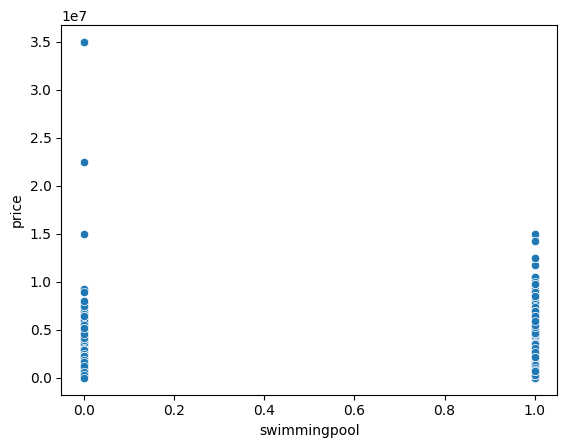

In [127]:
sns.scatterplot(data = df, x = 'swimmingpool', y = 'price');

In [128]:
df.swimmingpool.corr(df.price)

0.2688328954026956

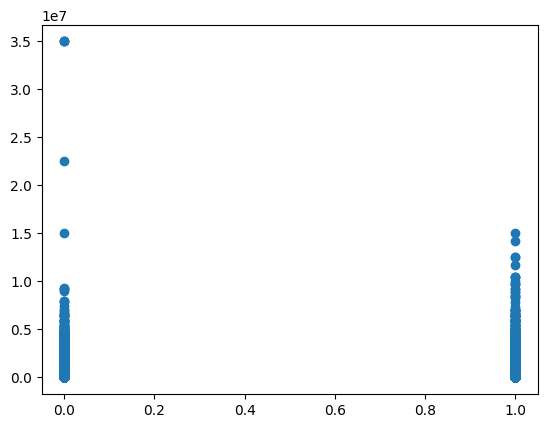

In [129]:
plt.scatter(df['swimmingpool'], df['price']);

# Terrace

In [130]:
df.terrace.isna().sum() / df.shape[0]

0.42346270139703807

In [131]:
df.terrace.value_counts(normalize= True, dropna = False) 

terrace
1.00   0.58
NaN    0.42
Name: proportion, dtype: float64

In [132]:
df.terrace.fillna(0, inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\2406609116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.terrace.fillna(0, inplace = True)


In [133]:
df.terrace = df.terrace.astype(int)
df.terrace.value_counts( dropna = False) 

terrace
1    67309
0    49438
Name: count, dtype: int64

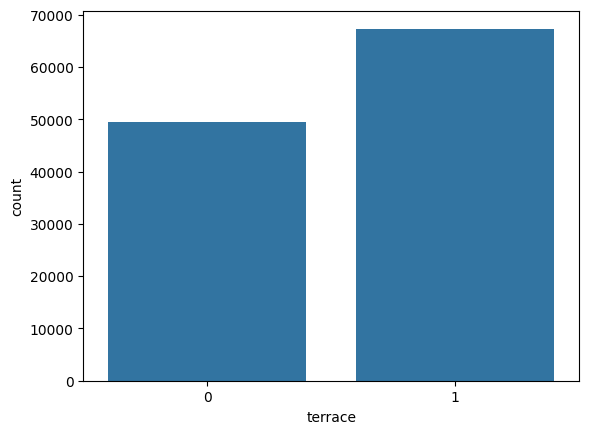

In [134]:
sns.countplot(data = df, x = 'terrace');

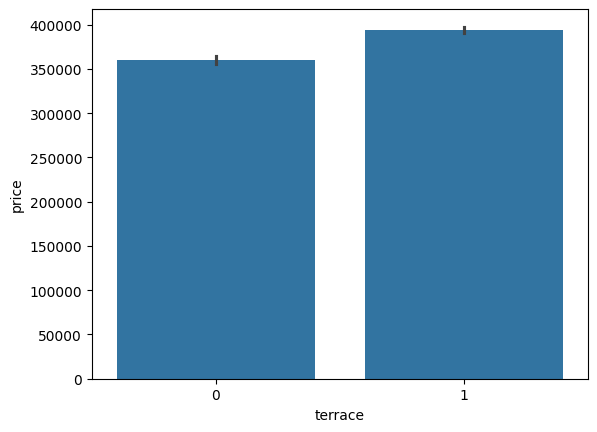

In [135]:
sns.barplot(data = df, x = 'terrace', y = 'price');

# ToiletCount

In [136]:
df.toiletcount.isna().sum()

21995

In [137]:
df.toiletcount.isna().sum() / df.shape[0] * 100

18.839884536647624

In [138]:
df.toiletcount.value_counts(normalize= True, dropna = False)

toiletcount
1.00         0.36
2.00         0.26
NaN          0.19
0.00         0.12
3.00         0.05
4.00         0.01
5.00         0.01
6.00         0.00
7.00         0.00
8.00         0.00
10.00        0.00
9.00         0.00
12.00        0.00
11.00        0.00
13.00        0.00
15.00        0.00
14.00        0.00
18.00        0.00
20.00        0.00
17.00        0.00
25.00        0.00
21.00        0.00
16.00        0.00
19.00        0.00
58.00        0.00
23.00        0.00
40.00        0.00
214.00       0.00
22.00        0.00
32.00        0.00
2147.00      0.00
27.00        0.00
3832365.00   0.00
Name: proportion, dtype: float64

In [139]:
df.toiletcount.fillna(df.toiletcount.mode()[0], inplace = True)

C:\Users\mehme\AppData\Local\Temp\ipykernel_22656\1210924512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.toiletcount.fillna(df.toiletcount.mode()[0], inplace = True)


In [140]:
df.toiletcount.isna().sum()

0

In [141]:
df.toiletcount = df.toiletcount.astype(int)

In [142]:
df.toiletcount.value_counts(normalize= True, dropna = False)

toiletcount
1         0.55
2         0.26
0         0.12
3         0.05
4         0.01
5         0.01
6         0.00
7         0.00
8         0.00
10        0.00
9         0.00
12        0.00
11        0.00
13        0.00
15        0.00
14        0.00
18        0.00
20        0.00
17        0.00
21        0.00
25        0.00
16        0.00
32        0.00
40        0.00
22        0.00
214       0.00
2147      0.00
23        0.00
58        0.00
27        0.00
19        0.00
3832365   0.00
Name: proportion, dtype: float64

# TypeOfProperty

In [143]:
df.typeofproperty.isna().sum()

0

In [144]:
df.typeofproperty.value_counts(normalize= True, dropna = False)

typeofproperty
2   0.51
1   0.49
Name: proportion, dtype: float64

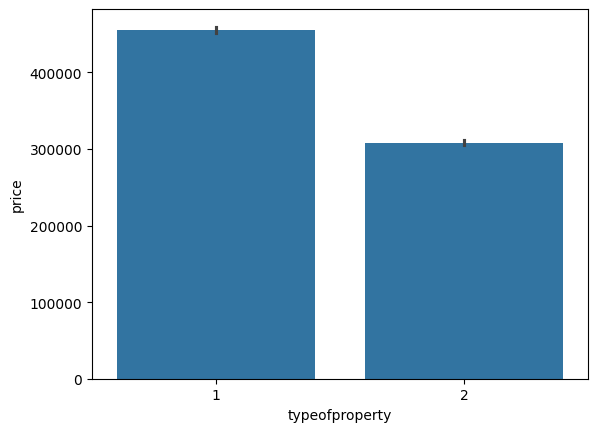

In [145]:
sns.barplot(data = df, x = 'typeofproperty', y = 'price');

# TypeOfSale

In [146]:
df.typeofsale.isna().sum()

0

In [147]:
df.typeofsale.value_counts(normalize= True, dropna = False)

typeofsale
residential_sale           0.88
residential_monthly_rent   0.11
annuity_monthly_amount     0.00
annuity_without_lump_sum   0.00
annuity_lump_sum           0.00
homes_to_build             0.00
Name: proportion, dtype: float64

# **INFO**

In [150]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 116747 entries, 0 to 118713
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   bathroomcount      116747 non-null  int32  
 1   bedroomcount       116747 non-null  int64  
 2   constructionyear   116747 non-null  int32  
 3   country            116747 non-null  object 
 4   district           116747 non-null  object 
 5   fireplace          116747 non-null  int32  
 6   floodingzone       116747 non-null  object 
 7   furnished          116747 non-null  int32  
 8   garden             116747 non-null  int32  
 9   kitchen            116747 non-null  int64  
 10  livingarea         116747 non-null  float64
 11  locality           116747 non-null  object 
 12  monthlycharges     116747 non-null  float64
 13  numberoffacades    116747 non-null  int32  
 14  peb                116747 non-null  object 
 15  postalcode         116747 non-null  int64  
 16  price  

In [151]:
df.isnull().sum()

bathroomcount        0
bedroomcount         0
constructionyear     0
country              0
district             0
fireplace            0
floodingzone         0
furnished            0
garden               0
kitchen              0
livingarea           0
locality             0
monthlycharges       0
numberoffacades      0
peb                  0
postalcode           0
price                0
propertyid           0
province             3
region               3
roomcount            0
showercount          0
stateofbuilding      0
subtypeofproperty    0
surfaceofplot        0
swimmingpool         0
terrace              0
toiletcount          0
typeofproperty       0
typeofsale           0
dtype: int64

# **OUTLIERS**

In [153]:
df.typeofsale.value_counts( dropna = False)

typeofsale
residential_sale            103125
residential_monthly_rent     13316
annuity_monthly_amount         190
annuity_without_lump_sum       109
annuity_lump_sum                 4
homes_to_build                   3
Name: count, dtype: int64

In [156]:
df_sales = df[df['typeofsale'] == 'residential_sale']
df_rent = df[df['typeofsale'] == 'residential_monthly_rent']

## **Price**

In [161]:
df_sales.price.describe()

count     103125.00
mean      428505.72
std       445016.98
min         2500.00
25%       249000.00
50%       335000.00
75%       459000.00
max     22500000.00
Name: price, dtype: float64

In [162]:
display(df_sales.shape)
Q1 = df_sales['price'].quantile(0.25)
Q3 = df_sales['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)
df_sales = df_sales[(df_sales['price'] > lower_bound) & (df_sales['price'] < upper_bound)]
display(df_sales.shape)


(103125, 30)

-66000.0 774000.0


(94891, 30)

In [164]:
df_sales.price.describe()

count    94891.00
mean    340274.63
std     142804.82
min       2500.00
25%     239000.00
50%     320000.00
75%     419000.00
max     773850.00
Name: price, dtype: float64

In [166]:
df_sales.to_csv('cleaned_dataset.csv', index=False)

In [167]:
df_sales.shape

(94891, 30)